In [70]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_combine = pd.merge(city_data, ride_data, on="city", how="outer")

# Display the data table for preview
city_ride_combine.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [71]:
# Find the average fare per city 
fair_per_city = ride_data.groupby("city")["fare"].mean()
fair_per_city.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [72]:
# Total number of rides per city
rides_per_city = ride_data.groupby("city")["ride_id"].count()
rides_per_city.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [73]:
# Total number of drivers per city
drivers_per_city = city_data.set_index("city")["driver_count"]
drivers_per_city.head()

city
Richardfort     38
Williamsstad    59
Port Angela     67
Rodneyfort      34
West Robert     39
Name: driver_count, dtype: int64

In [74]:
# City type
city_type = city_data.set_index("city")["type"]
city_type.head()

city
Richardfort     Urban
Williamsstad    Urban
Port Angela     Urban
Rodneyfort      Urban
West Robert     Urban
Name: type, dtype: object

In [164]:
# Create a table that lists above
ride_city_summary = ({"Average Fare Per City": fair_per_city,
                   "Total Number of Rides Per City": rides_per_city,
                   "Total Number of Drivers Per City": drivers_per_city,
                   "City Type": city_type,
                 })

ride_city_summary = pd.DataFrame(ride_city_summary)
ride_city_summary.head()

,Average Fare Per City,Total Number of Rides Per City,Total Number of Drivers Per City,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

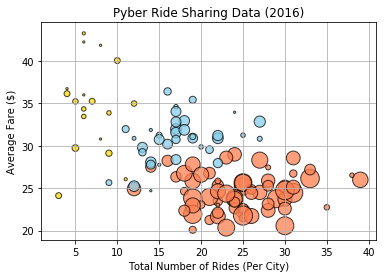

In [172]:
# Obtain the x and y coordinates for each of the three city types
urban = ride_city_summary[ride_city_summary["City Type"] == "Urban"]
suburban = ride_city_summary[ride_city_summary["City Type"] == "Suburban"]
rural = ride_city_summary[ride_city_summary["City Type"] == "Rural"]

# Build the scatter plots for each city types
plt.scatter(urban["Total Number of Rides Per City"],urban["Average Fare Per City"],s=urban["Total Number of Drivers Per City"]*5,color="coral",edgecolor="black",label="Urban",alpha=.75)
plt.scatter(suburban["Total Number of Rides Per City"],suburban["Average Fare Per City"],s=suburban["Total Number of Drivers Per City"]*5,color="skyblue",edgecolor="black",label="Suburban",alpha=.75)
plt.scatter(rural["Total Number of Rides Per City"],rural["Average Fare Per City"],s=rural["Total Number of Drivers Per City"]*5,color="gold",edgecolor="black",label="Rural",alpha=.75)
# Create a legend

# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.show()


## Total Fares by City Type

In [158]:
# Calculate Type Percents
total_fare_by_city_type = ride_city_summary.groupby(['City Type'])['Average Fare Per City'].sum()
total_fare_by_city_type.head()

City Type
Rural        623.479771
Suburban    1106.542729
Urban       1616.942033
Name: Average Fare Per City, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

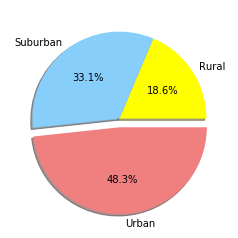

In [161]:
# Build Pie Chart
x= total_fare_by_city_type
labels = 'Rural','Suburban','Urban'
colors = ["yellow", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(x, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show


## Total Rides by City Type

In [155]:
# Calculate Ride Percents
total_ride_by_city_type = ride_city_summary.groupby(['City Type'])['Total Number of Rides Per City'].sum()
total_ride_by_city_type.head()

City Type
Rural        125
Suburban     625
Urban       1625
Name: Total Number of Rides Per City, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

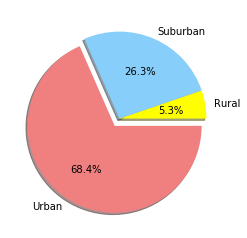

In [156]:
# Build Pie Chart
x= total_ride_by_city_type
labels = 'Rural','Suburban','Urban'
colors = ["yellow", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(x, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show


## Total Drivers by City Type

In [111]:
# Calculate Ride Percents
ride_number_city_type = ride_city_summary.groupby(['City Type'])['Total Number of Drivers Per City'].sum()
ride_number_city_type.head()

City Type
Rural         78
Suburban     490
Urban       2405
Name: Total Number of Drivers Per City, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

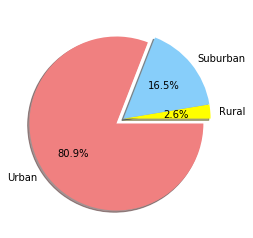

In [173]:
# Build Pie Chart
x= ride_number_city_type
labels = 'Rural','Suburban','Urban'
colors = ["yellow", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(x, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show
